# OpenCV 임계점 처리하기

cv2.threshold(image, thresh, max_value, type) : 임계값을 기준으로 흑/백으로 분류하는 함수

threshold == 한계치

- image: 처리할 Gray Scale의 이미지
- thresh: 임계 값 (전체 픽셀에 적용)
- max_value: 임계 값을 넘었을 때 적용할 값
- type: 임계점을 처리하는 방식
 1. THRESH_BINARY: 임계 값보다 크면 max_value, 작으면 0
 2. THRESH_BINARY_INV: 임계 값보다 작으면 max_value, 크면 0
 3. THRESH_TRUNC: 임계 값보다 크면 임계 값, 작으면 그대로
 4. THRESH_TOZERO: 임계 값보다 크면 그대로, 작으면 0
 5. THRESH_TOZERO_INV: 임계 값보다 크면 0, 작으면 그대로


In [2]:
from google.colab import files
uploaded = files.upload()

Saving gray_image.jpg to gray_image.jpg


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### 이미지의 기본 이진화

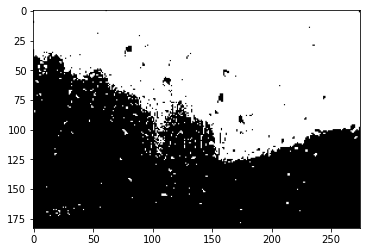

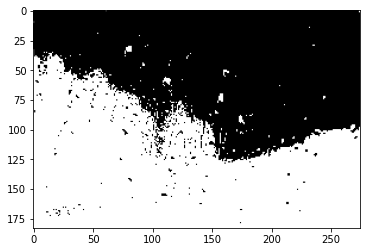

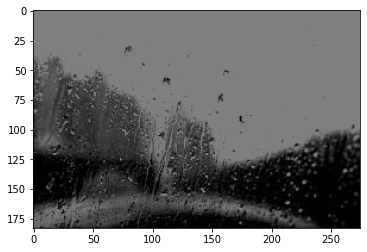

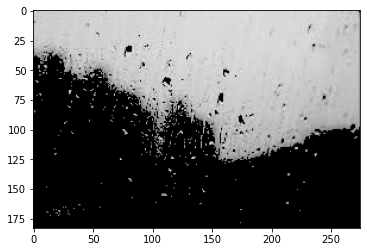

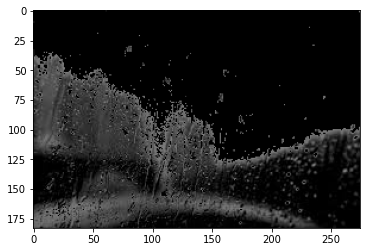

In [3]:
image = cv2.imread("gray_image.jpg", cv2.IMREAD_GRAYSCALE)  # Gray Scale로 이미지 읽기

images = []
ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
ret, thres2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
ret, thres3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
ret, thres4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
ret, thres5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
images.append(thres1)
images.append(thres2)
images.append(thres3)
images.append(thres4)
images.append(thres5)

for i in images:
  plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
  plt.show()

### 이미지의 적응 임계점 처리 (Adaptive Threshold)

cv2.adaptiveThreshold(image, max_value, adaptive_method, type, block_size, C): 적응 임계점 처리 함수

하나의 이미지에 다수의 조명 상태가 존재하는 경우 적용하면 좋다.

- max_value: 임계 값을 넘었을 때 적용할 값

- adaptive_method: 임계 값을 결정하는 계산 방법

 1. ADAPTIVE_THRESH_MEAN_C: 주변영역의 평균값으로 결정

 2. ADAPTIVE_THRESH_GAUSSIAN_C: 가우시안 필터로 결정

- type: 임계점을 처리하는 방식

- block_size: 임계 값을 적용할 영역의 크기

- C: 평균이나 가중 평균에서 차감할 값

'Adaptive Threshold' 를 이용하면, 전체 픽셀을 기준으로 임계 값을 적용하지 않습니다.

In [6]:
from google.colab import files
uploaded = files.upload()

Saving hand_writing.jpg to hand_writing.jpg


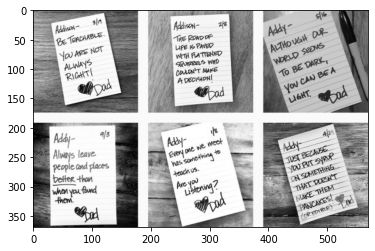

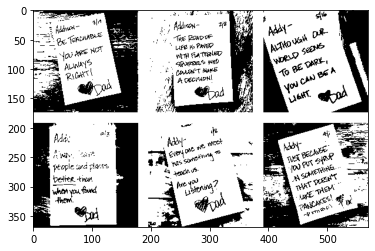

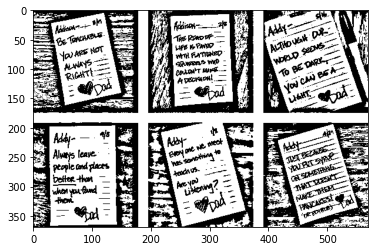

In [10]:
image_2 = cv2.imread('hand_writing.jpg', cv2.IMREAD_GRAYSCALE)

ret, thres1 = cv2.threshold(image_2, 127, 255, cv2.THRESH_BINARY)
thres2 = cv2.adaptiveThreshold(image_2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 3)  # 임계점이 자동으로 계산됨, 지정하지 않아도 됨

plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres1, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres2, cv2.COLOR_GRAY2RGB))
plt.show()

첫 번째 : 원본 이미지

두 번째 : 기본 Threshold

세 번째 : Adaptive Threshold

- 손글씨 같은 경우에는 여러 개의 조명이 존재하므로 적응 임계점 처리를 하면 보다 더 세부적인 관점에서 여러 개의 임계점을 처리할 수 있는 것을 볼 수 있다.